In [1]:
#importing important modules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading iris dataset from seaborn reserves
d=sns.load_dataset('iris')

In [3]:
d.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#checking null values
d.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
#seeing the various classes in our target
d.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
#mapping the classes to numeric values
d['Class']=d.species.map({'setosa':0,'versicolor':1, 'virginica':2})

In [7]:
d.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Class
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [8]:
#dropping the species column as its values are taken in numeric form in Class column
d=d.drop('species',axis=1)

In [9]:
d.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
#sorting the data wrt petal_length to shuffle dataset
d=d.sort_values('petal_length')

#### alternate method
#d=d.value 
#from random import shuffle
#shuffle(d)

In [11]:
#module to split data into train and test 
from sklearn.model_selection import train_test_split


In [12]:
x_train,x_test,y_train,y_test=train_test_split(d[['sepal_length','sepal_width','petal_length','petal_width']],d['Class'],test_size=0.2,random_state=1)

random_state is a parameter thst fixes the randomness of the sampling. eg: if 2 users use the same random state no. (random_state=1) on the same data, then they will get the same sampling.

### KNN (k-nearest neighbours)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#initialisation of KNN model
knn=KNeighborsClassifier(n_neighbors=5) #n_neighbors is the no. of neighbours

In [16]:
#fitting the model
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
#making predictions on test features x_test
pred=knn.predict(x_test)

In [18]:
#module for use of array and Scientific calculations
import numpy as np 

#converting test targets to array
y_test=np.array(y_test)

In [19]:
#for score(alternate method)
count=0
for i in range(len(x_test)):
    if pred[i]==y_test[i]:
        count+=1
print(count/len(x_test))

0.9666666666666667


In [20]:
knn.score(x_test,y_test)

0.9666666666666667

In [21]:
k=np.arange(1,20) 
sc=[]
for i in k:  #changing the no. of neighbors and then fitting for each change
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    sc.append(knn.score(x_test,y_test))
print(sc)

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


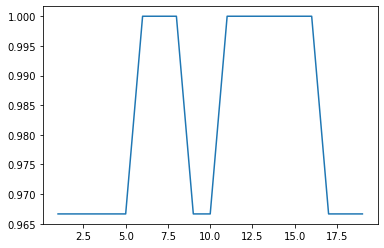

In [22]:
#plot of number of neighbours and score
plt.plot(k,sc)